# Enunciado do Exercício

Caro (a),Leandro,
Chegamos no final da nossa disciplina de Aprendizado Não-Supervisionado e é hora de validar nosso conhecimento. As questões teóricas podem ser respondidas em slides ou doc em formato .PDF, e devem ser disponibilizadas junto com o código.
O trabalho está dividido em 4 partes, como você pode observar a seguir. Para as questões a seguir, você deverá executar código em um notebook:
Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GITpúblico.

Feature Engineering

Resolva as questões do módulo do Kaggle de Feature Engineering:
https://www.kaggle.com/learn/feature-engineering (O módulo 6é opcional).

Escolha de base de dados

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1.Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link:

https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

2.Quantos países existem no dataset?

### São 167 paises no dataset.

3.Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

### Existem dados distorcidos, e para que  possa ser feito a clusterização é necessário fazer a normalização , ou a padronização da faixa de valores para que o agrupamento seja mais acertivo.

4.Realize o pré-processamento adequado dos dados.
### No notebook

Clusterização Para os dados pré-processados da etapa anterior você irá:

1.Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

a.K-Médias
### No notebook
b.Clusterização Hierárquica

### No notebook

2.Para os resultados, do K-Médias:

a.Interprete cada um dos clusters obtidos citando:

### Resposta no final do notebook
i.Qual a distribuição das dimensões em cada grupo;

### Resposta no final do notebook
ii.O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

### Resposta no final do notebook
3.Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

### Resposta no final do notebook
4.Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

### Resposta no final do notebook

Escolha de algoritmos

1.Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

### Resposta no final do notebook

Iteração e refinamento: O algoritmo pode ser iterado, ajustando-se os centroides e reatribuindo as amostras, com o objetivo de melhorar a qualidade dos clusters ou explorar diferentes configurações de parâmetros.
2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 
afim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

### Resposta no final do notebook
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.

### Resposta no final do notebook

4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?

### Resposta no final do notebook

Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identifi cando também adisciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.
Boa sorte!

In [1]:
#Importando as bibliotecas para rodar os algoritmos
from dataprep.eda import create_report
import dtale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from paretochart import pareto
from scipy.cluster.hierarchy import dendrogram, linkage

# Parte: Analise Exploratória 

In [2]:
# Carregando e Visualisando os dados iniciais
df=pd.read_csv("data\Country-data.csv")
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [3]:
#Transformando  a coluna country em index para fazer as operações
df=df.set_index('country')
df

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0    5.89     30.9    3280      14.00   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200  
...                         ...        ...    ...  
Vanuatu                    63.0       3.50   2970  
Venezuela                  75.4       2.47  13500  
Vietnam                    73.1       1.95   1310  
Yemen                      67.5       4.67   1310  
Zambia                     52.0       5.40   1460  

[167 rows x 9 columns]

In [4]:
#Informações sobre o dadaset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [5]:
#Verificando dados estatisticos
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
#Visualizando a  tabela complementar que funciona como uma legendas das colunas do dataset principal dos paises.
df2=pd.read_csv("data\data-dictionary.csv")
df2

Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...

In [7]:
#Usando a biblioteca o Dtale, para visualizar os informações que não foram possíveis pelo Pandas.
dt2=dtale.show(df2)
dt2

### Legenda da Tabela 
### child_mort: Morte de crianças menores de 5 anos de idade por 1000 nascidos vivo, variável contínua.

### exports: Exportações de bens e serviços per capita. Dado como % do PIB per capita, variável contínua.

### health: Gastos totais com saúde per capita. Dado como % do PIB per capita, variável contínua.

### imports: Importações de bens e serviços per capita. Dado como % do PIB per capita, variável contínua.

### Income:Renda líquida por pessoa, variável contínua.

### Inflation: A medição da taxa anual de crescimento do PIB Total, variável contínua.

### life_expec: O número médio de anos que uma criança recém-nascida viveria se os padrões atuais de mortalidade permanecessem os mesmos, variável contínua.

### total_fer: O número de filhos que nasceriam para cada mulher se as taxas atuais de fertilidade por idade permanecessem as mesmas. variável contínua.

### gdpp: O PIB per capita. Calculado como o PIB Total dividido pela população total. variável contínua.

In [8]:
'''Usando a biblioteca Dtale que serve como alternativa ao pandas. É possível verificar
os dados com mais detalhes de uma forma mais visual''' 
dt=dtale.show(df)
dt

In [9]:
#Verificandoo se tem dados nulos
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
#Verificando para  saber se tem dados duplicados
df.duplicated().sum()

0

  0%|          | 0/1784 [00:00<?, ?it/s]

c:\Users\leand\OneDrive\Área de Trabalho\BottCamp_Data  Science\Exercicio-Machine Learning-Aprendizado Não Supervisionado\.ansupervisionado\lib\site-packages\dask\core.py:121: RuntimeWarning:

invalid value encountered in divide



My Report
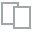
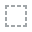
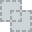
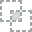
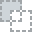
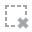
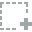
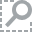
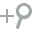
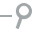
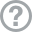
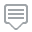
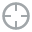
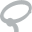
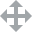
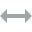
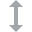
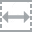
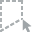
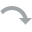
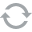
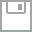
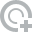
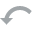
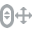
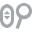
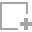
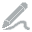
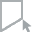
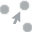
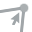
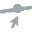

In [11]:
#Usando a biblioteca Dataprep para ter uma visão geral dos dadod do dataframe
create_report(df, title='My Report')

Text(0.5, 1.0, 'Mapa de calor de Matriz de Correlação')

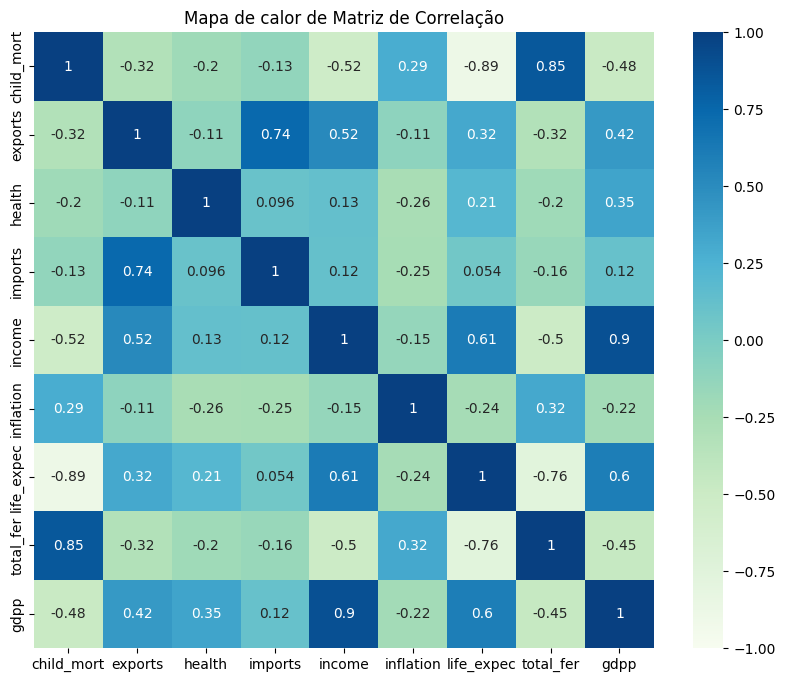

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10, 8))
sns.heatmap(df.corr(), cmap = 'GnBu',vmax=1,vmin=-1, annot = True)
ax.set_title('Mapa de calor de Matriz de Correlação')

In [13]:
# Visualisando as colunas
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

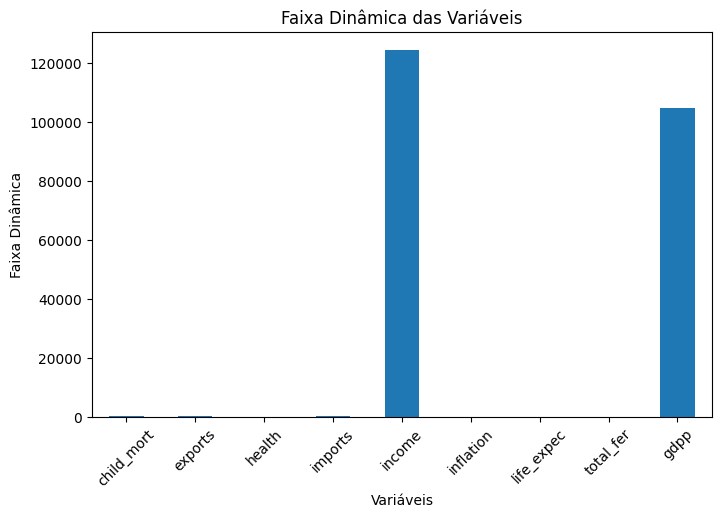

In [14]:

# Selecionar as colunas relevantes para a análise
variaveis = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
df_variaveis = df[variaveis]

# Calcular a faixa dinâmica das variáveis
faixa_dinamica = df_variaveis.max() - df_variaveis.min()

# Plotar o gráfico de barras para a faixa dinâmica
plt.figure(figsize=(8, 5))
faixa_dinamica.plot(kind='bar')
plt.xlabel('Variáveis')
plt.ylabel('Faixa Dinâmica')
plt.title('Faixa Dinâmica das Variáveis')
plt.xticks(rotation=45)
plt.show()


# Padronização do dados do dataset

In [15]:

# Os dados sendo escalonados
scaler = StandardScaler()

scaler_df = pd.DataFrame(scaler.fit_transform(df),
                           columns=df.columns,
                           index=df.index)
scaler_df


child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -1.138280  0.279088 -0.082455 -0.808245   
Albania               -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
Algeria               -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
Angola                 2.007808  0.775381 -1.448071 -0.165315 -0.585043   
Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225578  0.200917 -0.571711  0.240700 -0.738527   
Venezuela             -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
Vietnam               -0.372315  1.130305  0.008877  1.380030 -0.658404   
Yemen                  0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
Zambia                 1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.157336   -1.619092   1.902882 -0.679180  
Albania              -0.312347    0.647866  -0.859973 -0.485623  
Algeria               0.789274    0.670423  -0.038404 -0.465376  
Angola                1.387054   -1.179234   2.128151 -0.516268  
Antigua and Barbuda  -0.601749    0.704258  -0.541946 -0.041817  
...                        ...         ...        ...       ...  
Vanuatu              -0.489784   -0.852161   0.365754 -0.546913  
Venezuela             3.616865    0.546361  -0.316678  0.029323  
Vietnam               0.409732    0.286958  -0.661206 -0.637754  
Yemen                 1.500916   -0.344633   1.140944 -0.637754  
Zambia                0.590015   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

Text(0.5, 1.0, 'Mapa de calor de Matriz de Correlação Escalonada')

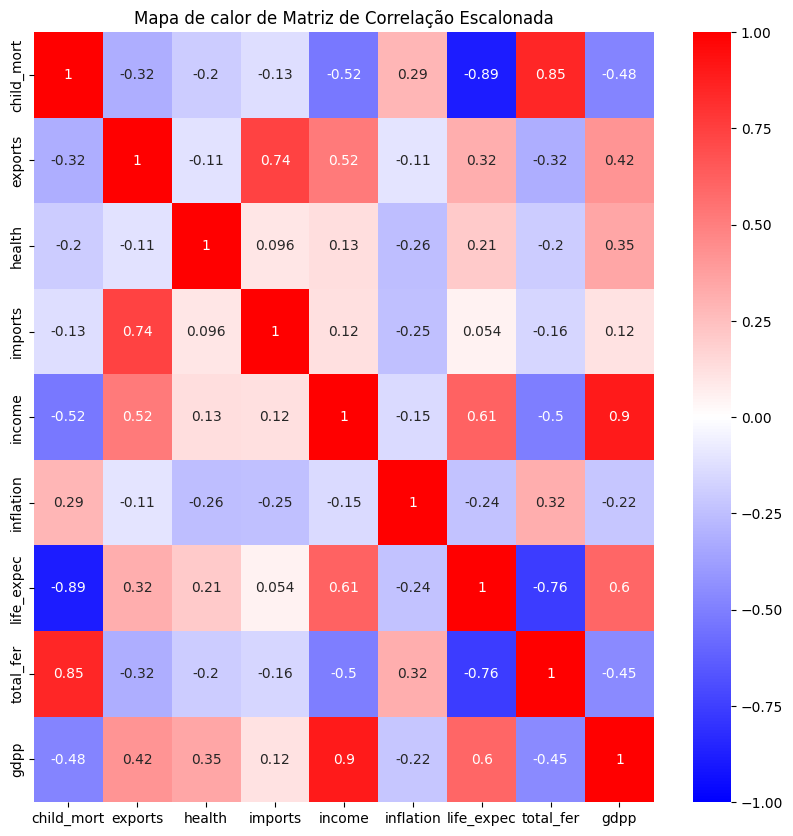

In [16]:

fig, ax = plt.subplots(1,1,figsize=(10, 10))
sns.heatmap(scaler_df.corr(), cmap = 'bwr',ax=ax,vmax=1,vmin=-1, annot = True)
ax.set_title('Mapa de calor de Matriz de Correlação Escalonada')

# Modelo Kmeans 

In [17]:

# Aplicando o Algoritmo de K médias ou K means
kmeans = KMeans(
    n_clusters=3,
    n_init=150, 
    max_iter=15000, 
    #random_state=42
)

kmeans.fit(scaler_df)

clusters = kmeans.predict(scaler_df)


df['cluster'] = clusters

df



child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0    5.89     30.9    3280      14.00   

                     life_expec  total_fer   gdpp  cluster  
country                                                     
Afghanistan                56.2       5.82    553        0  
Albania                    76.3       1.65   4090        1  
Algeria                    76.5       2.89   4460        1  
Angola                     60.1       6.16   3530        0  
Antigua and Barbuda        76.8       2.13  12200        1  
...                         ...        ...    ...      ...  
Vanuatu                    63.0       3.50   2970        1  
Venezuela                  75.4       2.47  13500        1  
Vietnam                    73.1       1.95   1310        1  
Yemen                      67.5       4.67   1310        0  
Zambia                     52.0       5.40   1460        0  

[167 rows x 10 columns]

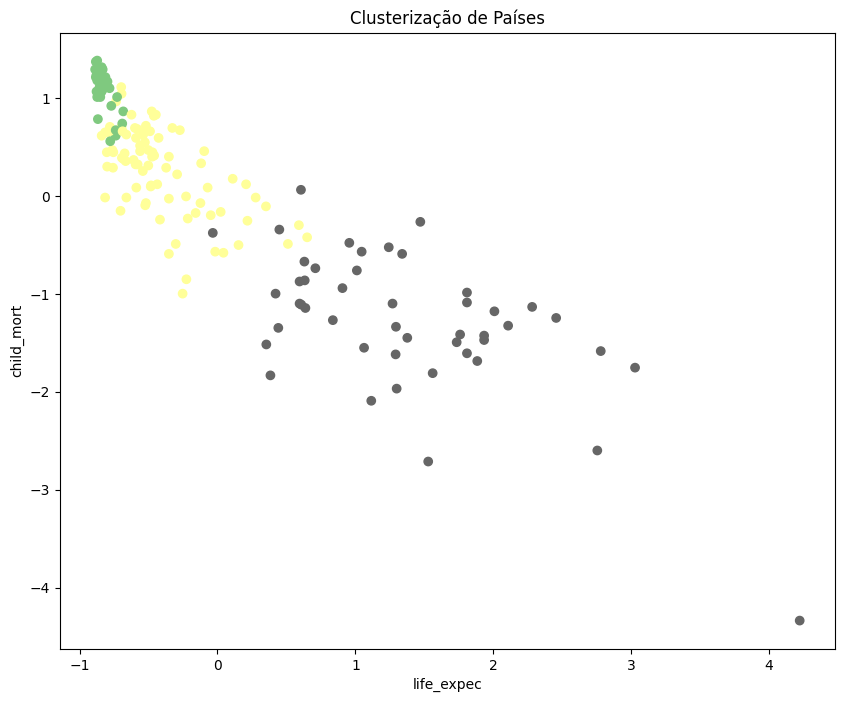

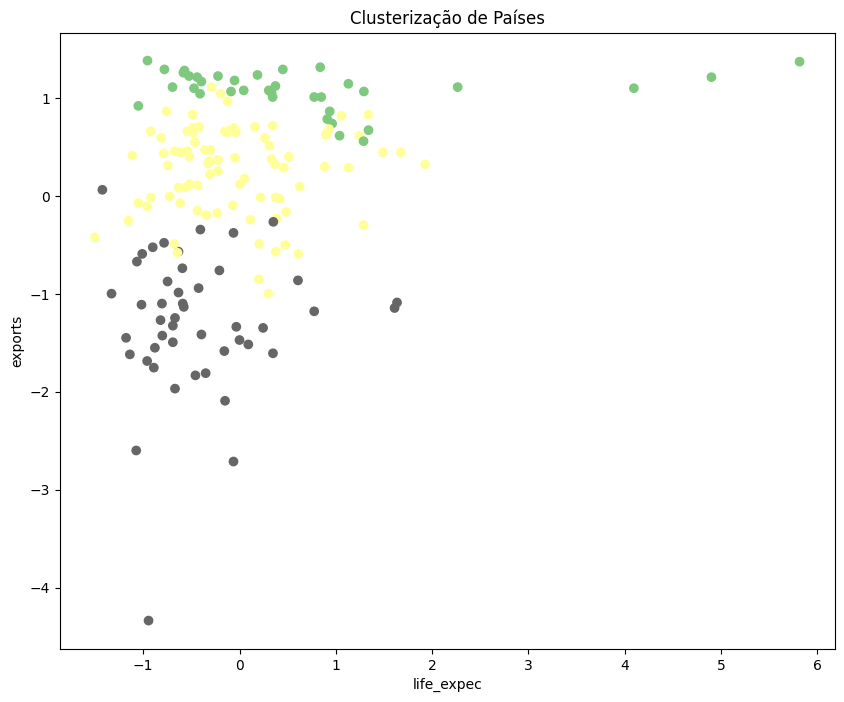

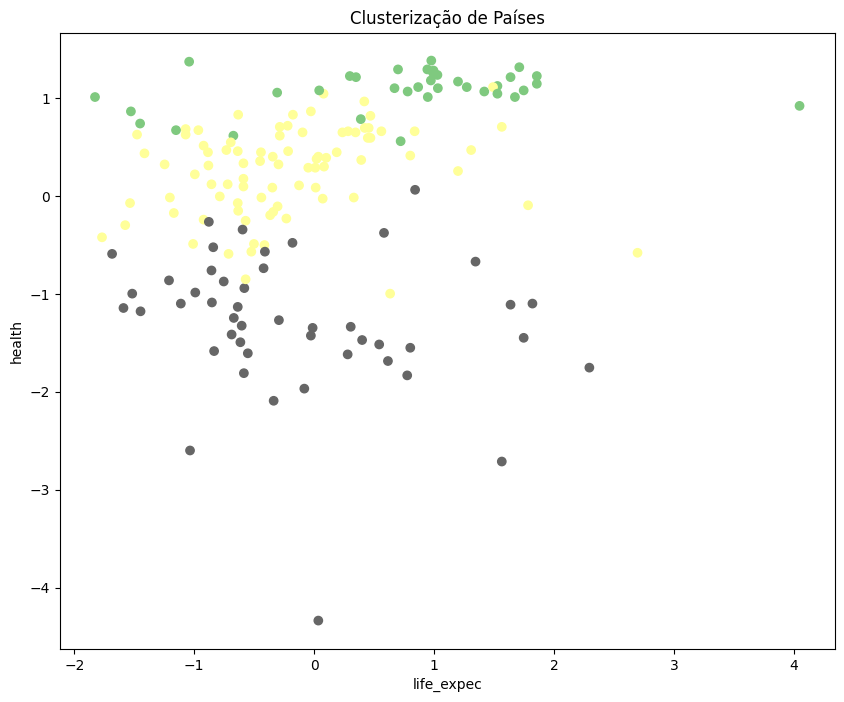

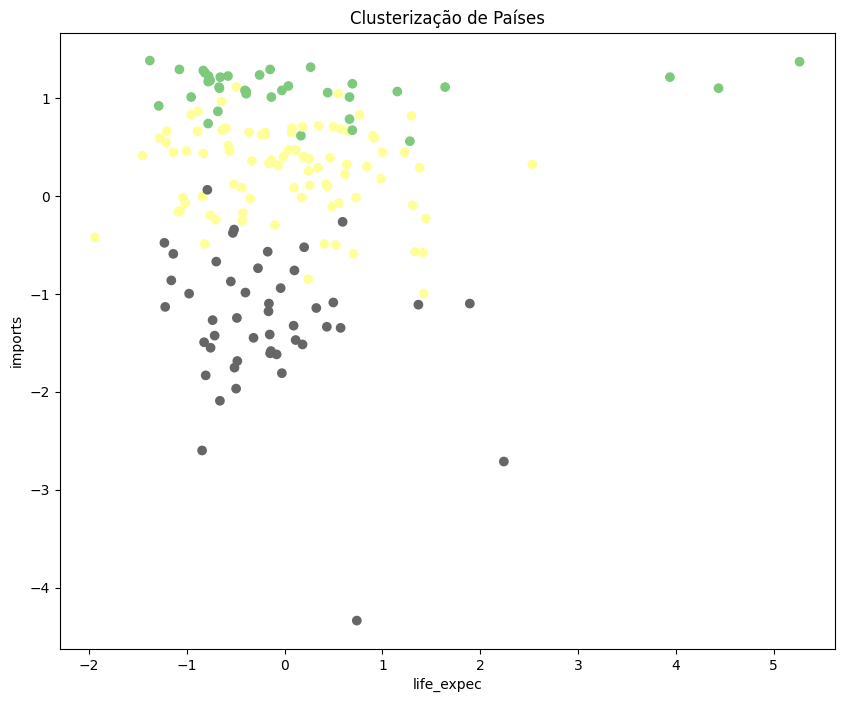

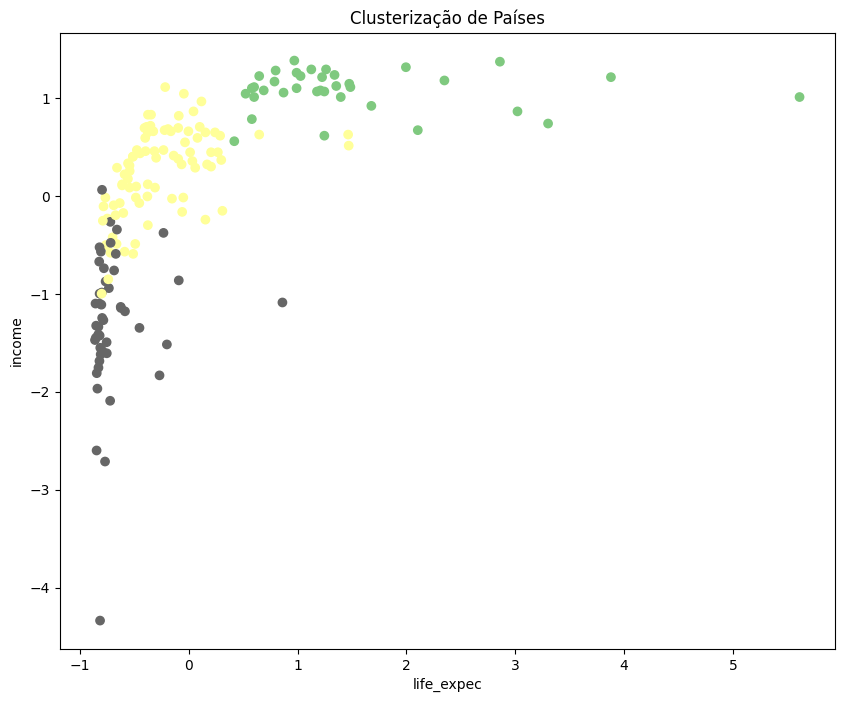

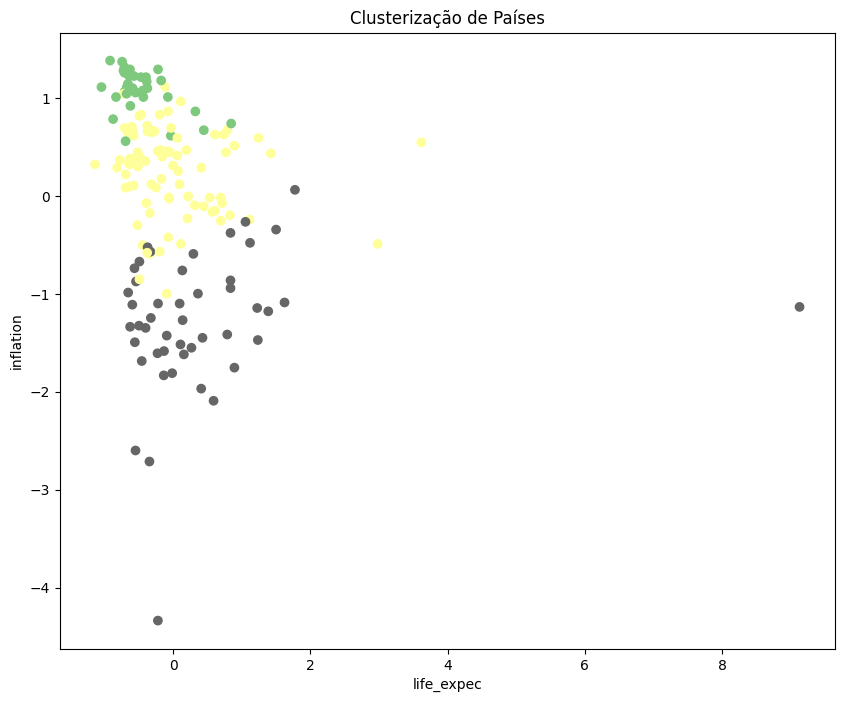

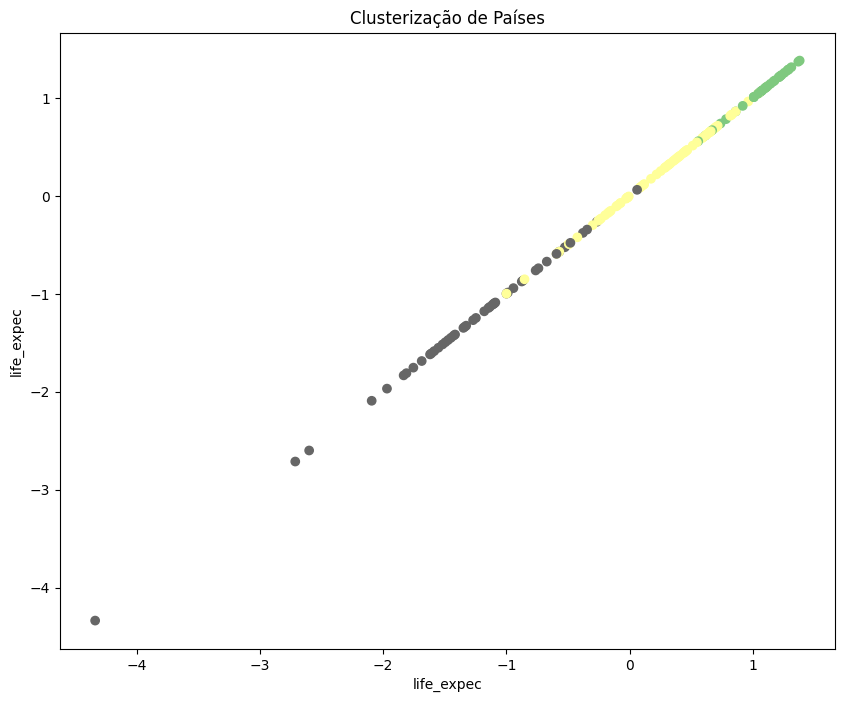

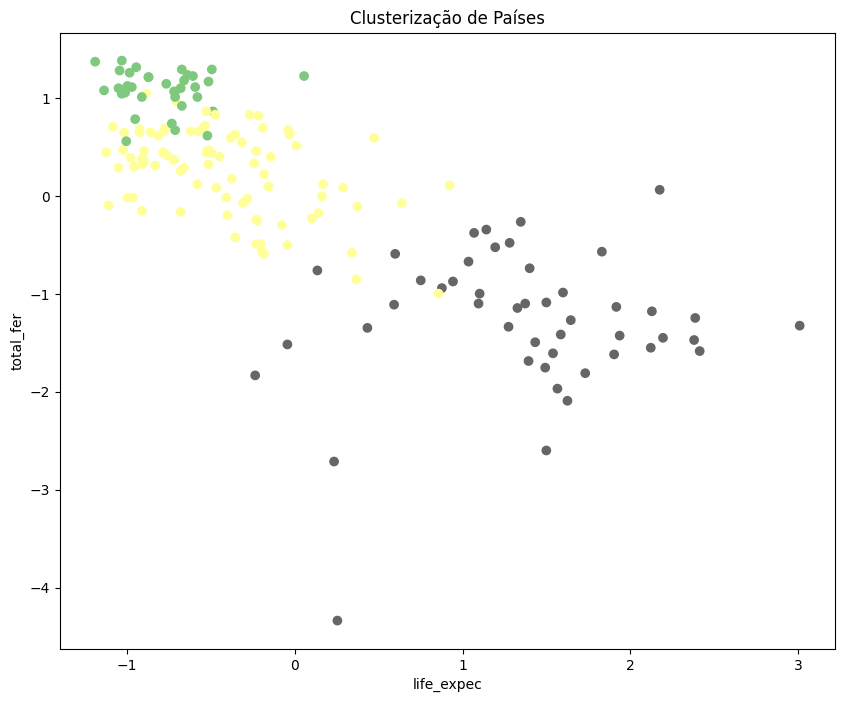

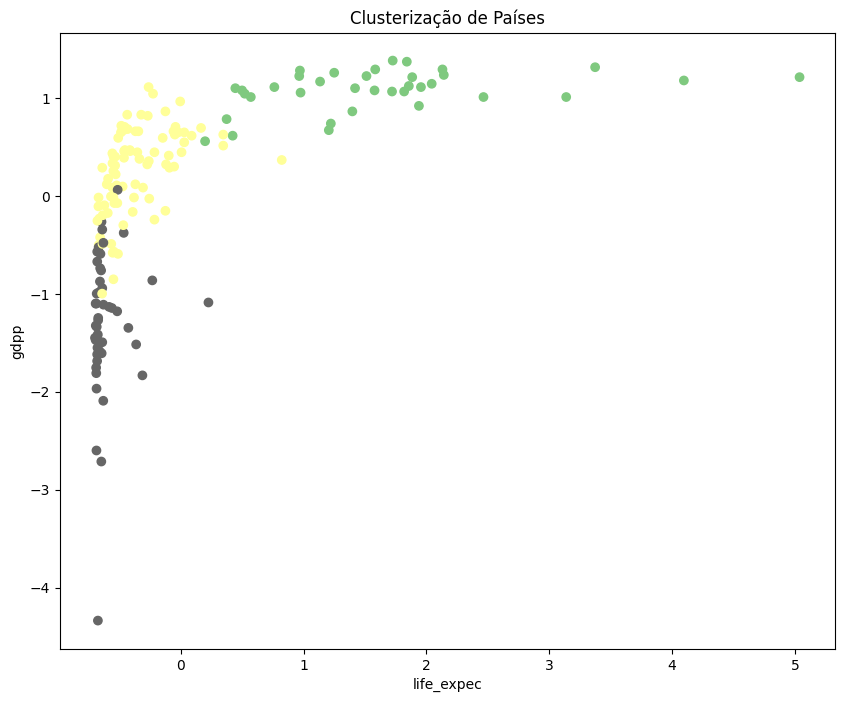

In [18]:
#Plotar o gráfico da clusterização
for col in scaler_df.columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.scatter(scaler_df[col], scaler_df['life_expec'], c=clusters, cmap='Accent_r')
    plt.xlabel('life_expec')
    plt.ylabel(col)
    plt.title('Clusterização de Países')
    #plt.colorbar()
    plt.show()


# Aplicar o modelo PCA 

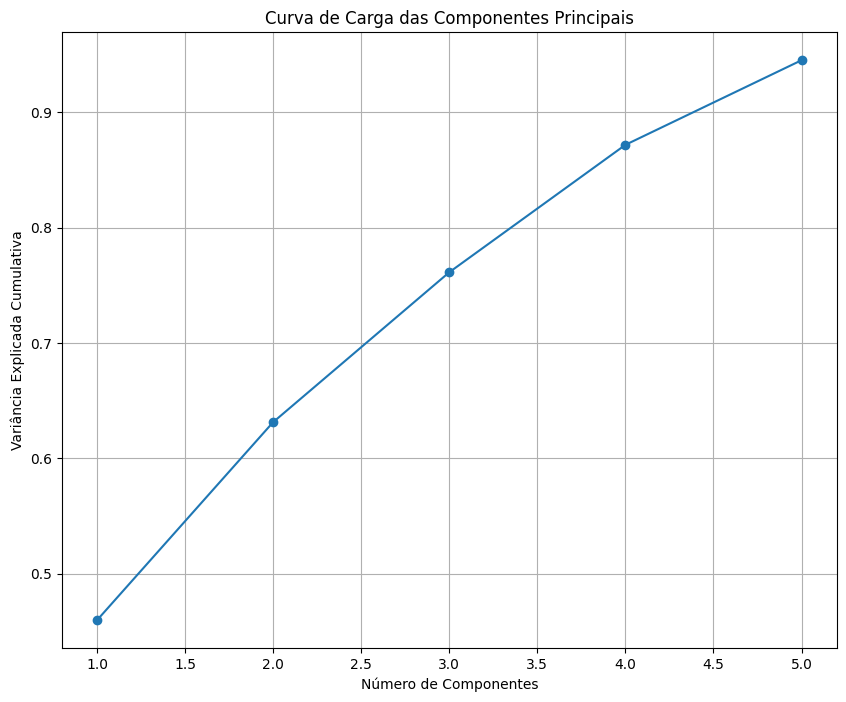

Número de componentes para representar 90% de variância explicada: 5


In [19]:


# Aplicar PCA
pca = PCA(n_components=5)
df_pca = pca.fit_transform(scaler_df)

# Variância explicada cumulativa
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plotar a curva de carga das componentes principais
fig, ax = plt.subplots(1, 1, figsize=(10,8 ))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Curva de Carga das Componentes Principais')
plt.grid(True)
plt.show()

# Determinar o número de componentes para atingir 90% ou mais de variância explicada
explained_variance_ratio_90 = explained_variance_ratio_cumulative[explained_variance_ratio_cumulative <= 0.95].shape[0]

print(f'Número de componentes para representar 90% de variância explicada: {explained_variance_ratio_90}')


c:\Users\leand\OneDrive\Área de Trabalho\BottCamp_Data  Science\Exercicio-Machine Learning-Aprendizado Não Supervisionado\.ansupervisionado\lib\site-packages\paretochart\paretochart.py:198: UserWarning:

FixedFormatter should only be used together with FixedLocator



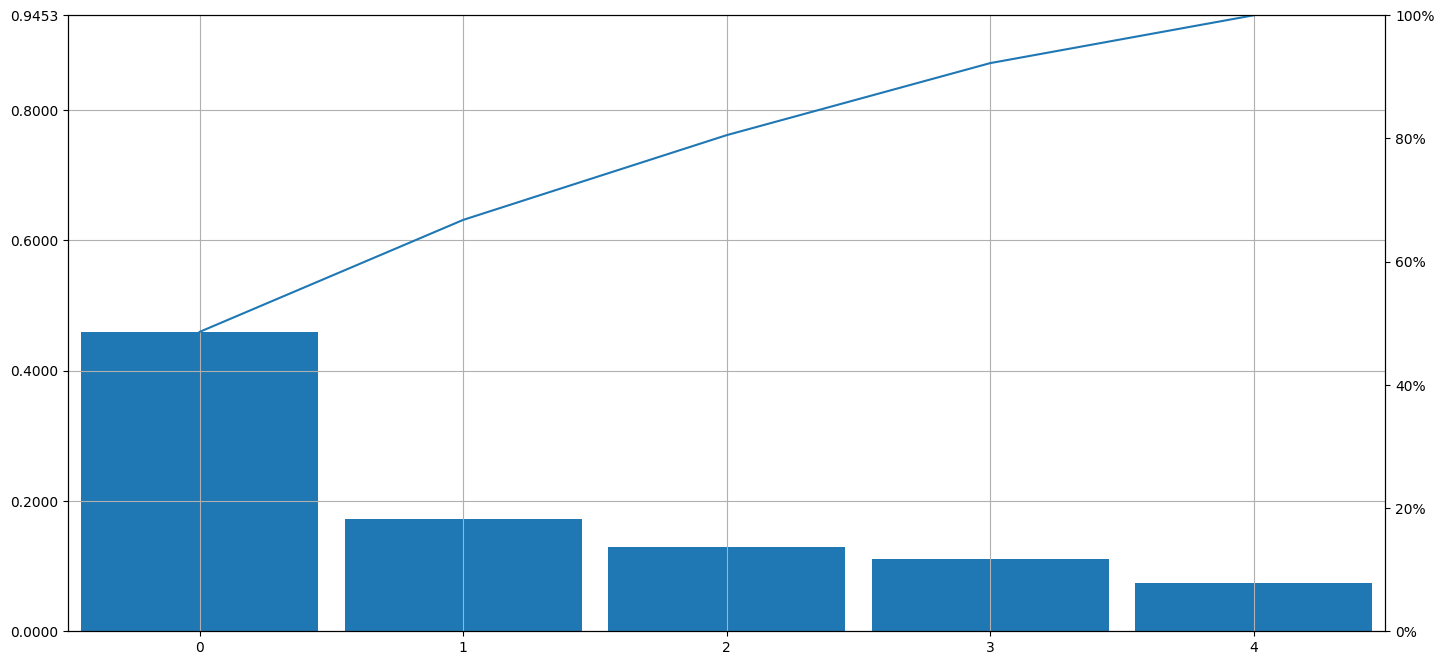

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(17,8 ))
pareto(pca.explained_variance_ratio_)
ax.grid()

In [21]:
# Arranjo de Valores
df_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

In [22]:

# Data Frame

df_pca=pd.DataFrame(df_pca)
df_pca

0         1         2         3         4
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]

# Aplicando novamente o kmeans após o modelo PCA 

In [23]:
# Aplicando o Algoritmo de K médias ou K means
kmeans = KMeans(
    n_clusters=3,
    n_init=150, 
    max_iter=15000, 

)

kmeans.fit(df_pca)

pca_clusters = kmeans.predict(df_pca)


df['pca_cluster'] = pca_clusters

df

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0    5.89     30.9    3280      14.00   

                     life_expec  total_fer   gdpp  cluster  pca_cluster  
country                                                                  
Afghanistan                56.2       5.82    553        0            0  
Albania                    76.3       1.65   4090        1            2  
Algeria                    76.5       2.89   4460        1            2  
Angola                     60.1       6.16   3530        0            0  
Antigua and Barbuda        76.8       2.13  12200        1            2  
...                         ...        ...    ...      ...          ...  
Vanuatu                    63.0       3.50   2970        1            2  
Venezuela                  75.4       2.47  13500        1            2  
Vietnam                    73.1       1.95   1310        1            2  
Yemen                      67.5       4.67   1310        0            0  
Zambia                     52.0       5.40   1460        0            0  

[167 rows x 11 columns]

In [24]:
#Usando Dtale para ter uma melhor visualização sobre a cçusterização e as dimensões
dtale.show(df)

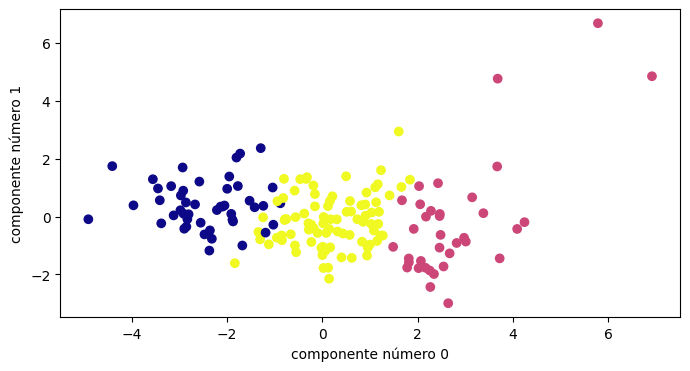

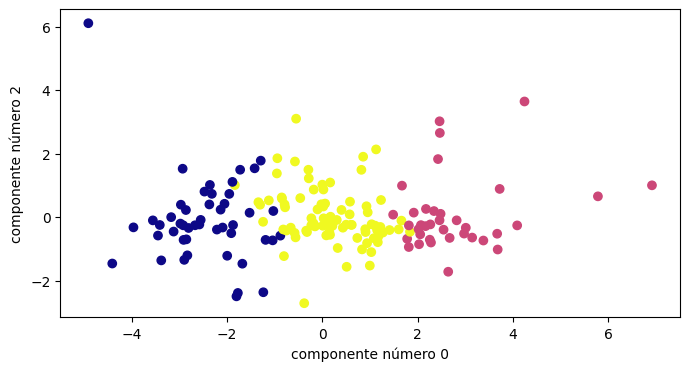

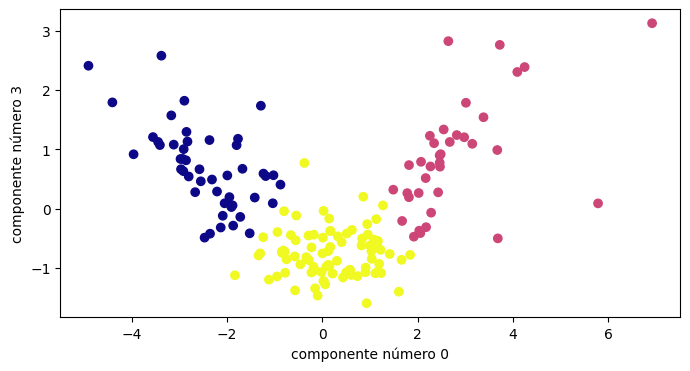

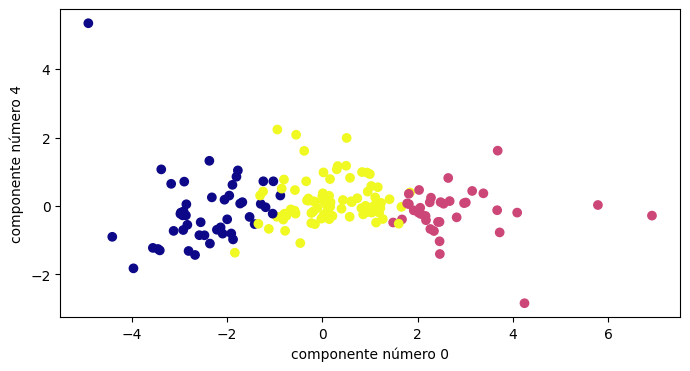

In [25]:
#Plotar o gráfico da clusterização
pc = [1,2,3,4]
for a in pc:
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.scatter(df_pca[0],df_pca[a],c=pca_clusters, cmap="plasma")  
    ax.set_xlabel("componente número 0")
    ax.set_ylabel(f'componente número {a}')  

### Esse bloco é para calcular a distancia entre os pontos do dataframe  e as centroides dos clusters.

In [26]:
#Variável que armazena as centroides
centro_pca = kmeans.cluster_centers_

In [27]:
# Função para fazer o calculo dos indeces dos pontos mais próximos a centreides.
def encontrar_ponto(df, centro):
    ponto_pr = np.zeros(centro.shape[0], dtype=int)
    for a, cen in enumerate(centro):
        dist = np.linalg.norm(df - cen, axis=1)
        ponto_pr[a] = np.argmin(dist)
    return ponto_pr
# Variável  Retorna o resultado  
ponto = encontrar_ponto(df_pca, centro_pca)

In [28]:
#Variável em que é criada uma coluna com o indice inicial no dataframe.
df_indx = df.reset_index()

In [29]:
#Imprime os pontos proximos da centroide
print(ponto)

[166  68 143]


In [30]:
# loop para imprimir os pontos mais próximos as centreides
for j, point_index in enumerate(ponto):
    print(f"A Centróide  do cluster {j} se aproxima do  País : {df_indx.loc[point_index]}")

A Centróide  do cluster 0 se aproxima do  País : country        Zambia
child_mort       83.1
exports          37.0
health           5.89
imports          30.9
income           3280
inflation        14.0
life_expec       52.0
total_fer         5.4
gdpp             1460
cluster             0
pca_cluster         0
Name: 166, dtype: object
A Centróide  do cluster 1 se aproxima do  País : country        Iceland
child_mort         2.6
exports           53.4
health             9.4
imports           43.3
income           38800
inflation         5.47
life_expec        82.0
total_fer          2.2
gdpp             41900
cluster              2
pca_cluster          1
Name: 68, dtype: object
A Centróide  do cluster 2 se aproxima do  País : country        Suriname
child_mort         24.1
exports            52.5
health             7.01
imports            38.4
income            14200
inflation           7.2
life_expec         70.3
total_fer          2.52
gdpp               8300
cluster               1


# Clusterização Hierarquica

                     Cluster_labels
country                            
Afghanistan                       1
Albania                           2
Algeria                           2
Angola                            1
Antigua and Barbuda               2
...                             ...
Vanuatu                           2
Venezuela                         2
Vietnam                           2
Yemen                             1
Zambia                            1

[167 rows x 1 columns]


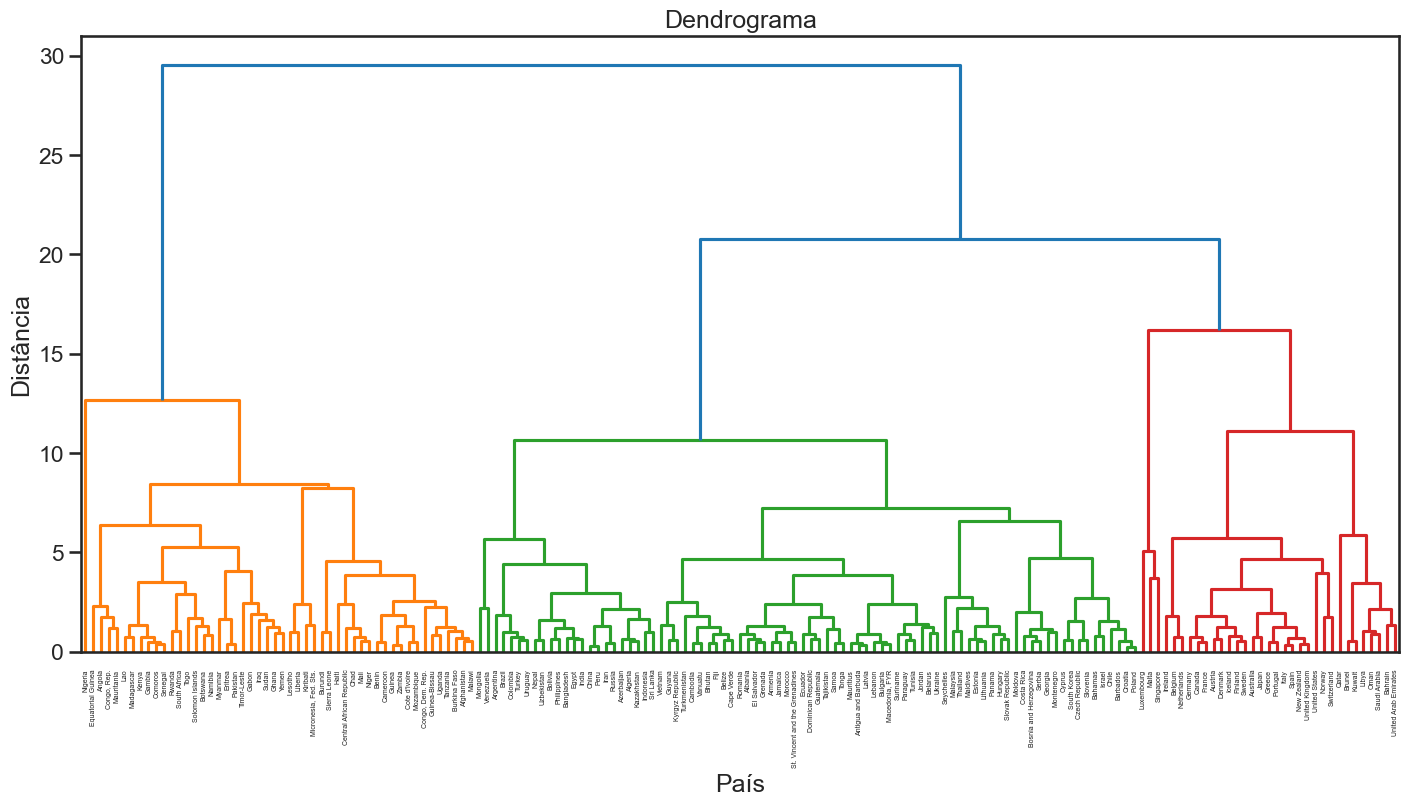

In [31]:


sns.set_style('ticks')
sns.set_context('talk')


# Criar o modelo de clusterização hierárquica com 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)

# Realizar a clusterização hierárquica
cluster_labels = hierarchical.fit_predict(df_pca)

# Adicionar as atribuições de cluster ao DataFrame original
df['Cluster_labels'] = cluster_labels

# Exibir o resultado
print(df[['Cluster_labels']])

# Realizar a ligação aglomerativa
linkage_matrix = linkage(df_pca, method='ward')

# Plotar o dendrograma
#plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
dendrogram(linkage_matrix, labels=scaler_df.index, leaf_rotation=45)
plt.title('Dendrograma')
plt.xlabel('País')
plt.ylabel('Distância')
plt.xticks(rotation=90)
plt.show()



In [32]:
#Visualizando o dataframe final
dtale.show(df)

# Resposta para o Bloco : Clusterização Para os dados pré-processados da etapa anterior você irá:

1.Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

a.K-Médias
### No Notebbok
b.Clusterização Hierárquica
### No Notebook
2.Para os resultados, do K-Médias:

a.Interprete cada um dos clusters obtidos citando:

### No geral os clusters apresentam caracteristicas parecidas com pouca coesão interna com pontos não muito próximos, com relação a distancia entre os clusters foram mais proximos, indicando que os centroides estão mais próximos. Com relação a densidade no geral os pontos estão espalhados mas tem algumas variáves que apresenta  pelo menos 1 cluster com densidade maior de pontos.

### Usando o modelo PCA , análise de componente principal, com 5 componentes foi possível cobrir 95% dos valores. Os clusters ficaram mais definidos com menos distorções em relação aos pontos.

i.Qual a distribuição das dimensões em cada grupo;

### O criteria usado para fazer o agrupamento foi principalmente em relação aos valores proximos ou muito próximos da mortalidade infantil (child_mort), a saúde(health) e expectativa de vida  (life_expec) para formar os 3 grupos.

ii.O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

### Suriname, Zambia e Iceland. Usando o calculo das distancia entre os pontos dos clusters e as centreides é possível determinar o indice dos ponto mais proximo  ou seja o pais mais perto da centride.

3.Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

### O Dendograma está acima no notebook. No grafico do dendograma a altura indica  a distancia entre os clusters ou dissimilaridade entre , na ramificação no horizontal pode indicar similaridade ou dissimilaridade relativa. As ramificações mais altas olhando as ramificações mais altas  na vertical mostram uma visão geral dos  clusters ou agrupamento a fim de se obter insights. Atraves das ramificações menores a possível analisar subgrupos dentro dos clusters  e ter uma visão mais especificar dentro dos agrupamentos.

4.Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

### O Kmeans na primeira analise apresenta clusters mais difusos com ruido pontos dispersos no geral, já na clusterização hierarquica no dendograma é possivel ter uma visão geral  e mais específica  dos clusters onde é possível perceber que  o clusters de cor laranja são países mais pobres, já no grupo verde os países são emergentes, e no grupo em vermelhor temos países mais desenvolvidos com indices melhores e relação aos outros clusters. No kmeans tem uma visão mais global dos clusters , já na clusterização hierarquica é possível fazer uma análise mais detalhada. 



# Respostas do Bloco: Escolha de algoritmos

1.Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

### 1)Inicialização: Definir o número de clusters K e selecionar aleatoriamente K centroides iniciais a partir dos dados ou através de uma estratégia específica.

### 2)Atribuição de amostras: Calcular a distância entre cada amostra e os centroides e atribuir cada amostra ao cluster cujo centroide é o mais próximo.

### 3)Atualização dos centroides: Calcular os novos centroides para cada cluster, utilizando a média das amostras atribuídas a cada cluster.

### 4)Reatribuição de amostras: Repetir as etapas 2 e 3 até que não ocorram mais alterações nas atribuições dos clusters ou até que seja alcançado um critério de parada, como um número máximo de iterações.

### 5)Convergência: Quando as atribuições dos clusters não mudam mais, o algoritmo é considerado convergido e as amostras estão agrupadas em K clusters distintos.

### 6)Avaliação do resultado: Avaliar a qualidade dos clusters formados utilizando métricas como a inércia (soma das distâncias quadráticas das amostras aos centroides) ou índices de validação externa, se houverem rótulos verdadeiros disponíveis.

### 7)Iteração e refinamento: O algoritmo pode ser iterado, ajustando-se os centroides e reatribuindo as amostras, com o objetivo de melhorar a qualidade dos clusters ou explorar diferentes configurações de parâmetros.

2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 
afim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

### Para que os requisitos da questão seja atendido, é necessário usar um algoritmo especifico como  K medoide que é selecionado por objetos reais do cluster de forma iterativa, onde diferentes objetos são considerados como medoides potenciais e a escolha é feita com base em uma métrica de dissimilaridade, como a distância euclidiana. O objetivo é encontrar o objeto dentro do cluster que minimize a soma das distâncias entre ele e os outros objetos do mesmo cluster.

### Ao usar medoides em vez de centróides, o algoritmo de k-medoides é mais robusto a outliers e pontos extremos, uma vez que os medoides são pontos de dados reais existentes no conjunto de dados, enquanto os centróides podem ser influenciados por valores extremos. Portanto, os medoides fornecem uma representação mais estável e representativa de um cluster.



Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.

### Sim. O algoritmo K means usa a centroide, que é a média dos pontos do cluster, quando existem pontos fora  do esperado , no caso os outliers , acaba por afetar  o resultado, a representatividade do algoritmo fica prejudicada com resultado impreciso.

4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?

### O DBScan tem um conceito explícito de pontos ruidosos, que são pontos isolados ou com baixa densidade que não são atribuídos a nenhum cluster específico. Isso permite que o algoritmo identifique e ignore outliers que não estão próximos o suficiente de regiões densas de pontos, identifica clusters com base na densidade local dos pontos. Ele não se concentra em calcular a média dos pontos, o que torna menos suscetível a distorções causadas por outliers. O DBScan pode identificar clusters de diferentes formas e tamanhos, adaptando-se à densidade local dos pontos. Isso permite que ele agrupe pontos densos em regiões não uniformes, enquanto ignora pontos isolados ou esparsos.


In [33]:
!pip freeze < requirements.txt

aiohttp==3.8.4
aiosignal==1.3.1
anyio==3.7.0
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
async-timeout==4.0.2
attrs==23.1.0
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
bokeh==2.4.3
Brotli==1.0.9
certifi==2023.5.7
cffi==1.15.1
charset-normalizer==3.1.0
click==8.1.3
cloudpickle==2.2.1
colorama==0.4.6
comm==0.1.3
contourpy==1.0.7
cycler==0.11.0
dash==2.10.2
dash-bootstrap-components==1.3.1
dash-colorscales==0.0.4
dash-core-components==2.0.0
dash-daq==0.5.0
dash-html-components==2.0.0
dash-table==5.0.0
dask==2023.6.0
dataprep==0.4.5
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
dtale==2.16.0
et-xmlfile==1.1.0
exceptiongroup==1.1.1
executing==0.8.3
fastjsonschema==2.17.1
Flask==2.2.5
Flask-Compress==1.13
Flask-Cors==3.0.10
flask-ngrok==0.0.25
fonttools==4.39.4
fqdn==1.5.1
frozenlist==1.3.3
fsspec==2023.6.0
future==0.18.3
idna==3.4
importlib-metadata==6.6.0
ipykernel==6.23.1
ipython==8.14.0
ipython-genutils==0.2.0
ipywidgets==7.7.5
isoduration=